In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [2]:
display (os.getcwd())


'C:\\Users\\DELL'

In [3]:
os.chdir ('D:\\Sales Forecasting')
display (os.getcwd())


'D:\\Sales Forecasting'

In [4]:
dt = pd.read_csv('Train.csv')
display (dt.head())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
print (dt.shape)

(8523, 12)


In [6]:
display (dt.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
display (dt.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [9]:
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
display (dt.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
for col in cat_col:
    print(col , len(dt[col].unique()))


Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [14]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print ('*' *50)



Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**************************************************
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**************************************************
Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**************************************************
Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2

In [15]:
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [16]:
display (dt['Item_Weight'].isnull().sum())


1463

In [17]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display (Item_Weight_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [18]:
Item_Weight_null['Item_Identifier'].value_counts()


Item_Identifier
FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: count, Length: 1142, dtype: int64

In [19]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [20]:
display (dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [21]:
for i, item in enumerate(dt['Item_Identifier']):
    print(i, item)


0 FDA15
1 DRC01
2 FDN15
3 FDX07
4 NCD19
5 FDP36
6 FDO10
7 FDP10
8 FDH17
9 FDU28
10 FDY07
11 FDA03
12 FDX32
13 FDS46
14 FDF32
15 FDP49
16 NCB42
17 FDP49
18 DRI11
19 FDU02
20 FDN22
21 FDW12
22 NCB30
23 FDC37
24 FDR28
25 NCD06
26 FDV10
27 DRJ59
28 FDE51
29 FDC14
30 FDV38
31 NCS17
32 FDP33
33 FDO23
34 DRH01
35 NCX29
36 FDV20
37 DRZ11
38 FDX10
39 FDB34
40 FDU02
41 FDK43
42 FDA46
43 FDC02
44 FDL50
45 FDM39
46 NCP05
47 FDV49
48 FDL12
49 FDS02
50 NCL17
51 FDM40
52 FDR13
53 FDA43
54 NCP18
55 FDK21
56 NCX54
57 DRK35
58 FDY21
59 FDI26
60 FDM20
61 FDV27
62 FDF09
63 FDY40
64 FDY45
65 FDC46
66 FDH19
67 FDZ03
68 DRH37
69 NCI17
70 FDJ58
71 FDL12
72 FDH35
73 FDG02
74 NCZ18
75 FDC29
76 FDQ10
77 FDN48
78 FDL04
79 FDV25
80 FDD58
81 FDN04
82 FDV45
83 NCL18
84 FDR12
85 FDG20
86 FDZ55
87 FDQ49
88 FDN33
89 FDN27
90 FDW20
91 DRG27
92 DRI25
93 FDA44
94 NCR17
95 FDU04
96 FDF41
97 FDB56
98 NCP18
99 FDB56
100 FDT28
101 FDD10
102 FDW57
103 DRB48
104 FDP09
105 FDH14
106 FDA47
107 FDG12
108 DRE60
109 DRK49
110 FDD03


In [22]:
for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])


In [23]:
result = dt['Item_Weight'].isnull().sum()
display (result)


0

In [24]:
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)


,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [25]:

result= dt['Outlet_Size'].isnull().sum()
display (result)


2410

In [26]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [27]:
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)


Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [28]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [29]:
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [30]:
miss_bool = dt['Outlet_Size'].isnull()
miss_bool


0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [31]:
display(dt['Outlet_Size'].isnull().sum())


2410

In [32]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)



Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [33]:
display (sum(dt['Item_Visibility']==0))


526

In [34]:
dt['Item_Visibility'].mean()


0.06613202877895108

In [35]:
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)

In [36]:
sum(dt['Item_Visibility']==0)


0

In [37]:
display (sum(dt['Item_Visibility']==0))

0

In [38]:
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [39]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [40]:
display (dt['New_Item_Type'].value_counts())

New_Item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [41]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())


New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [42]:

display (dt['Item_Fat_Content'].value_counts())


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [43]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [44]:
dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (dt['Item_Fat_Content'].value_counts())
display (result)

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [45]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [46]:
dt['Outlet_Years'] = 2022 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])



0       23
1       13
2       23
3       24
4       35
        ..
8518    35
8519    20
8520    18
8521    13
8522    25
Name: Outlet_Years, Length: 8523, dtype: int64


In [47]:
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,35


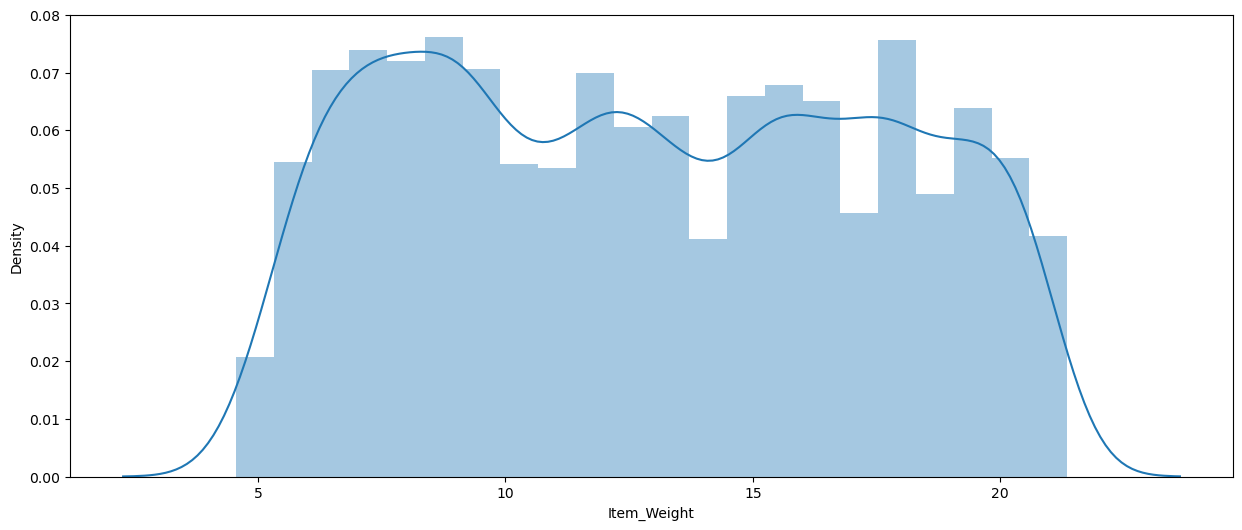

In [48]:
sns.distplot(dt['Item_Weight'])
plt.show()


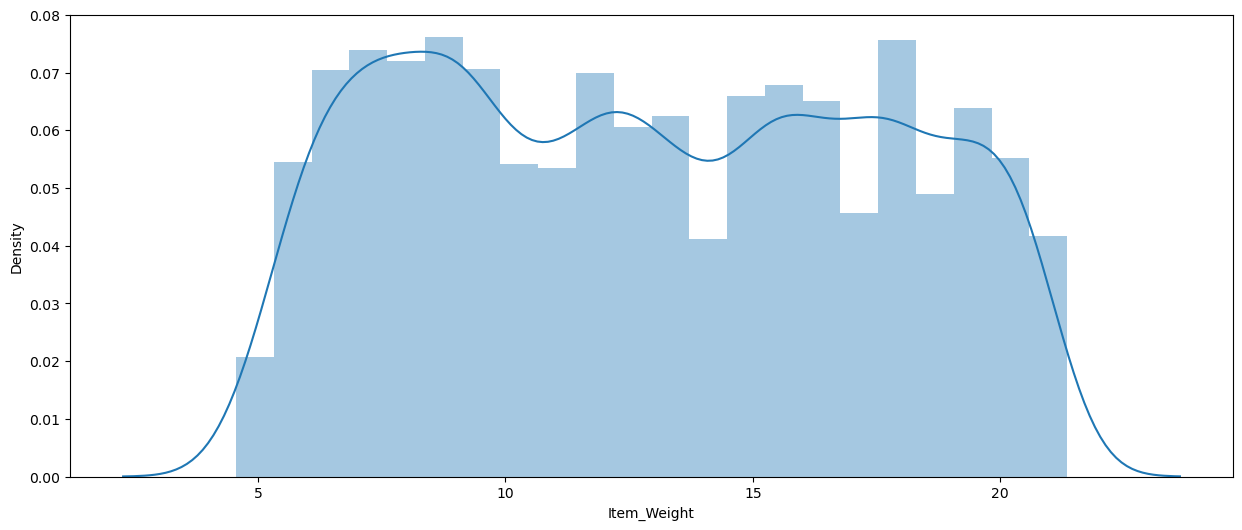

In [49]:
sns.distplot(dt['Item_Weight'])
plt.show()


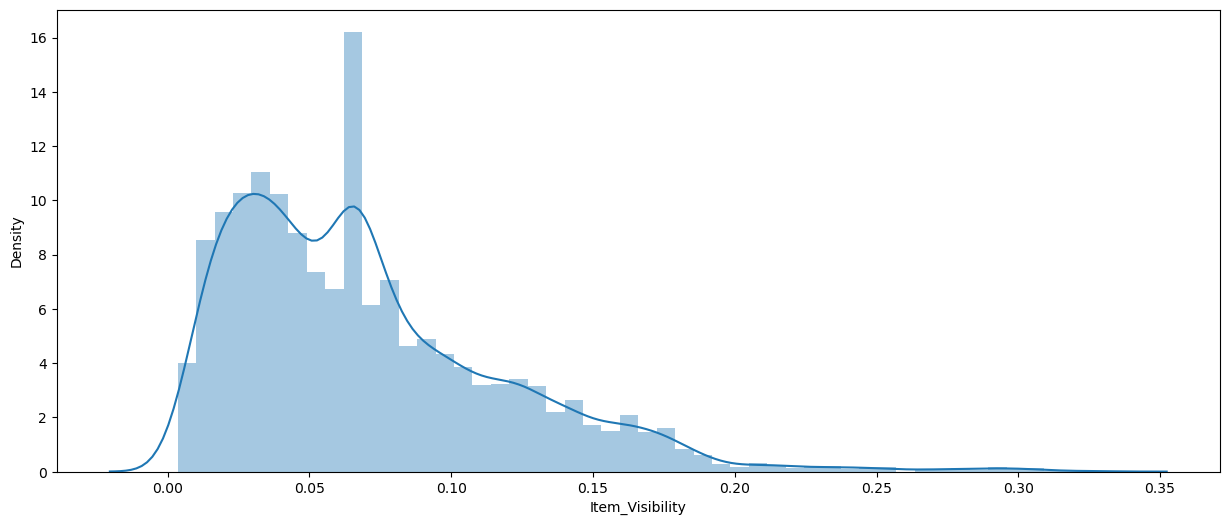

In [50]:
sns.distplot(dt['Item_Visibility'])
plt.show()


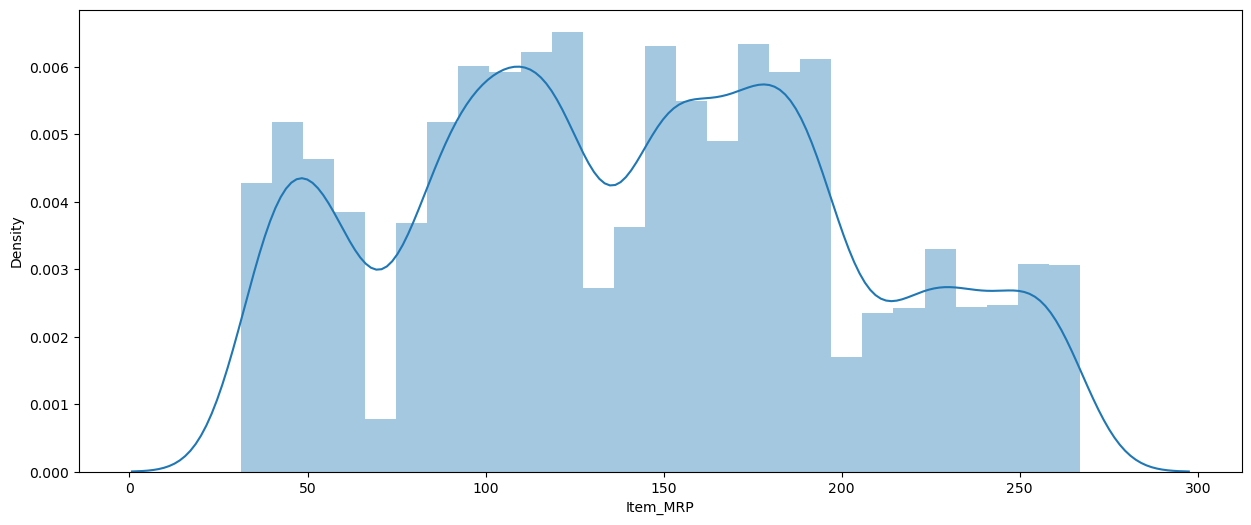

In [51]:
sns.distplot(dt['Item_MRP'])
plt.show()


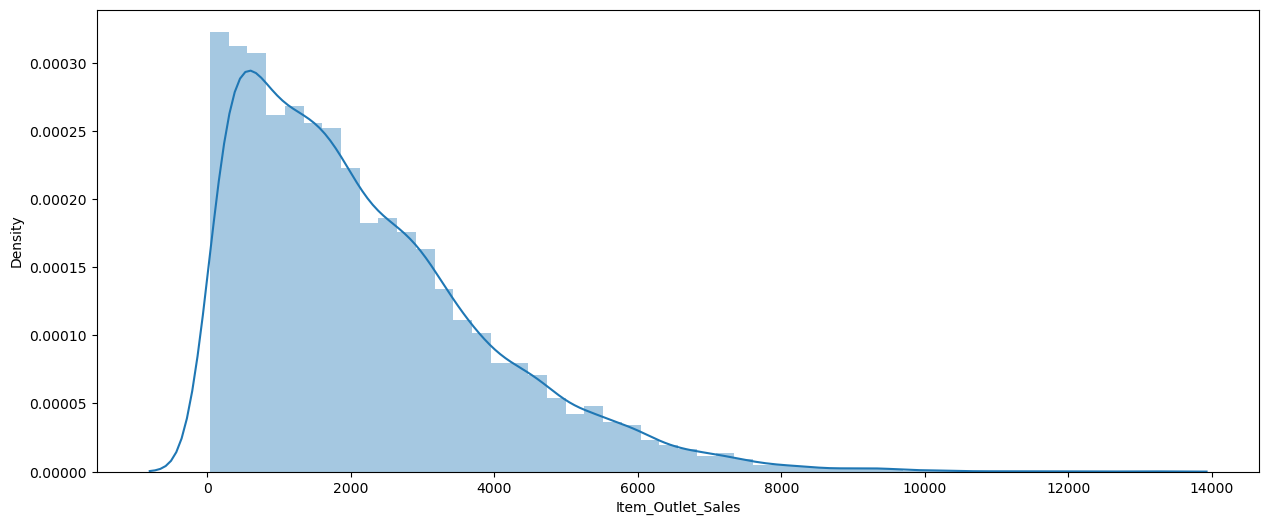

In [52]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()


In [53]:
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])


0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

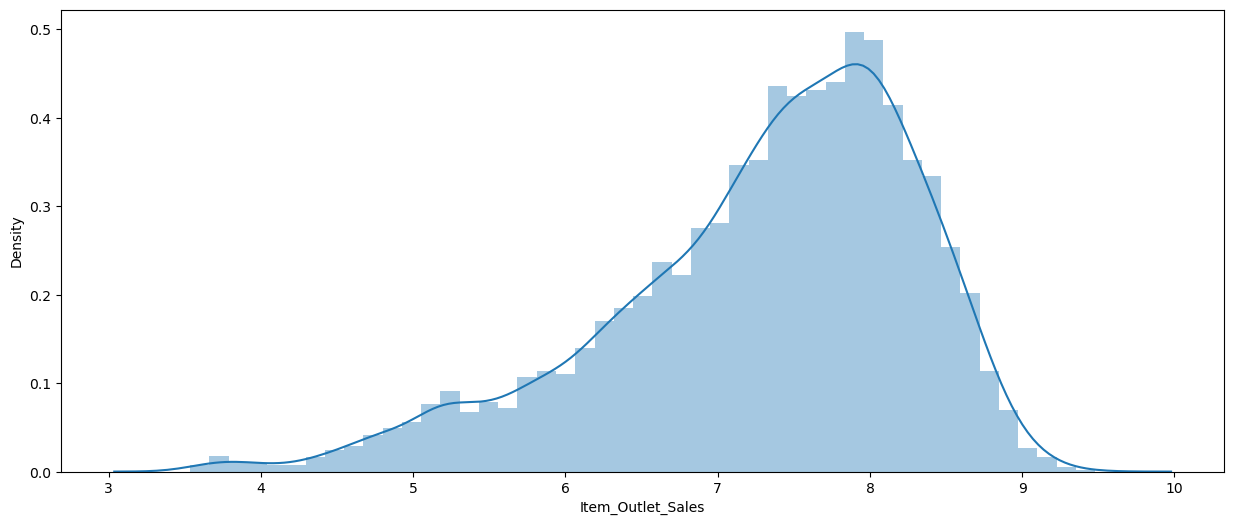

In [54]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()


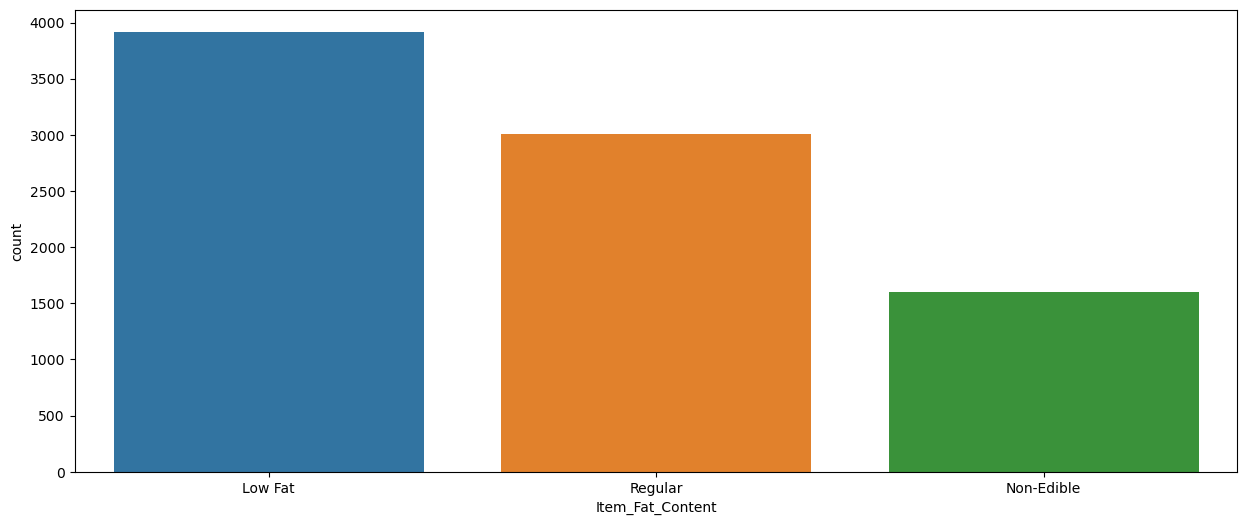

In [55]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()


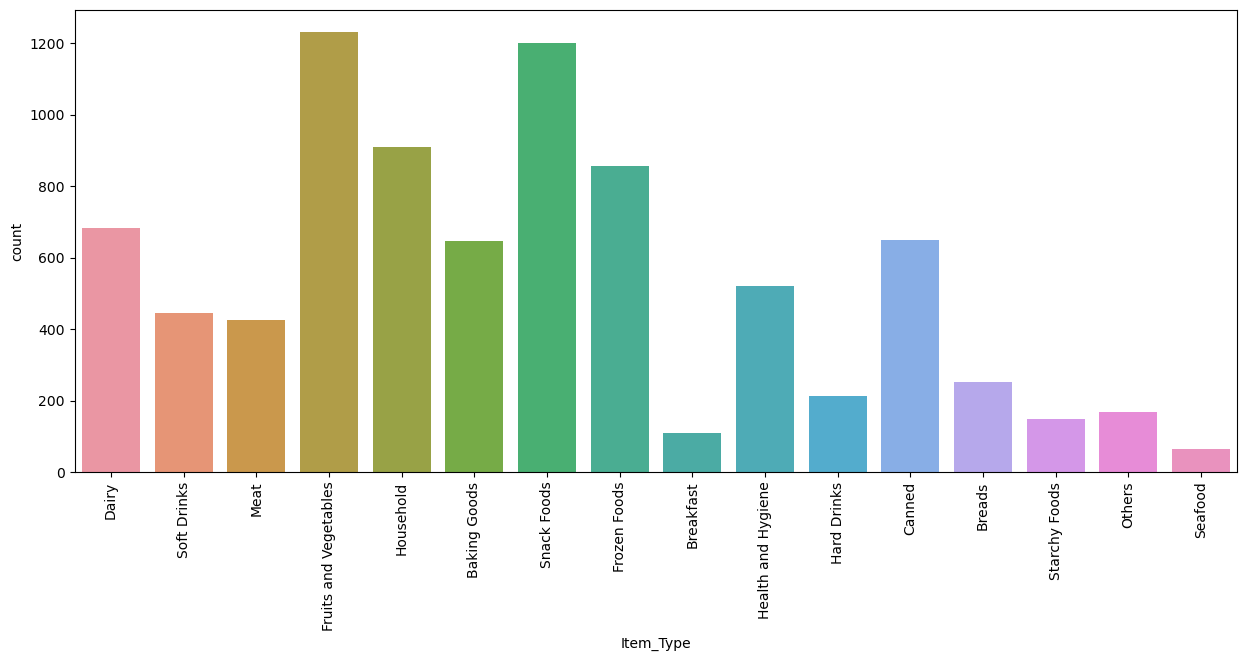

In [56]:
# l is the list of unique Item Types - This is used to display X-Label 
l = list(dt['Item_Type'].unique()) 
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()


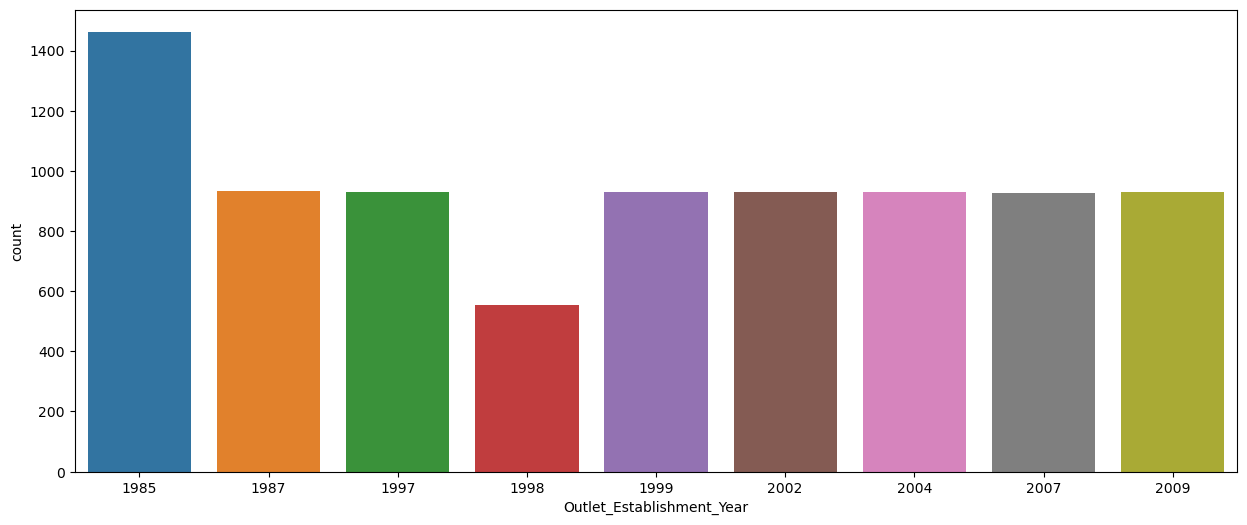

In [57]:
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()



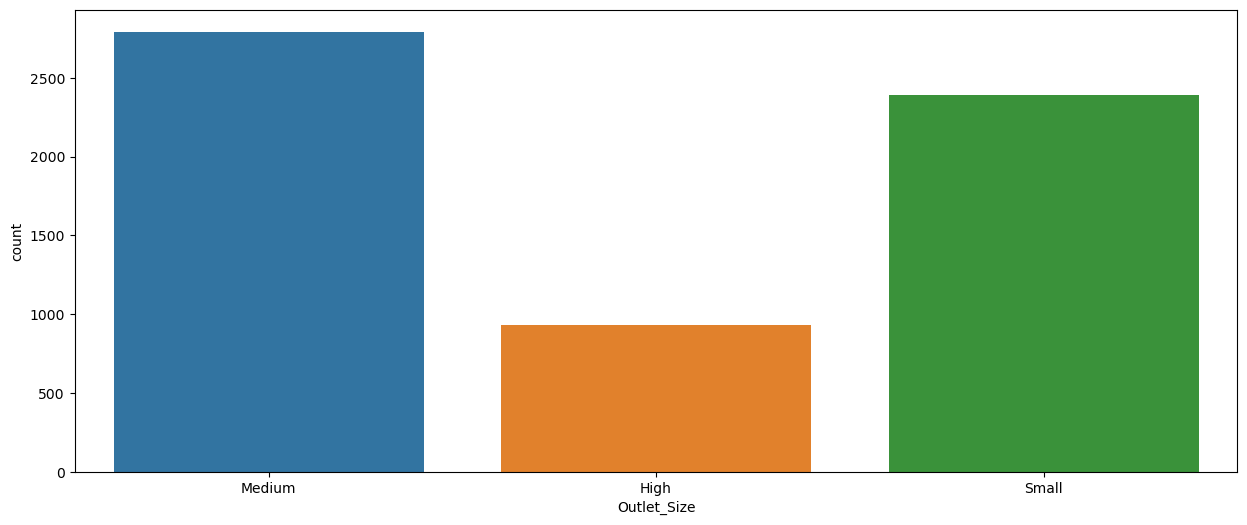

In [58]:
sns.countplot(x=dt['Outlet_Size'])
plt.show()


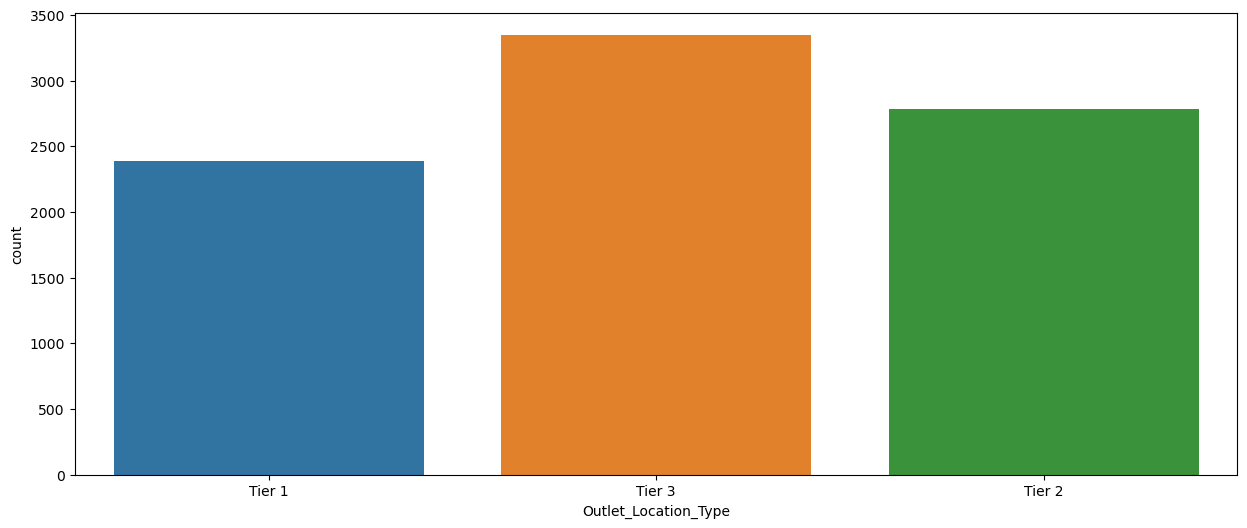

In [59]:
sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()


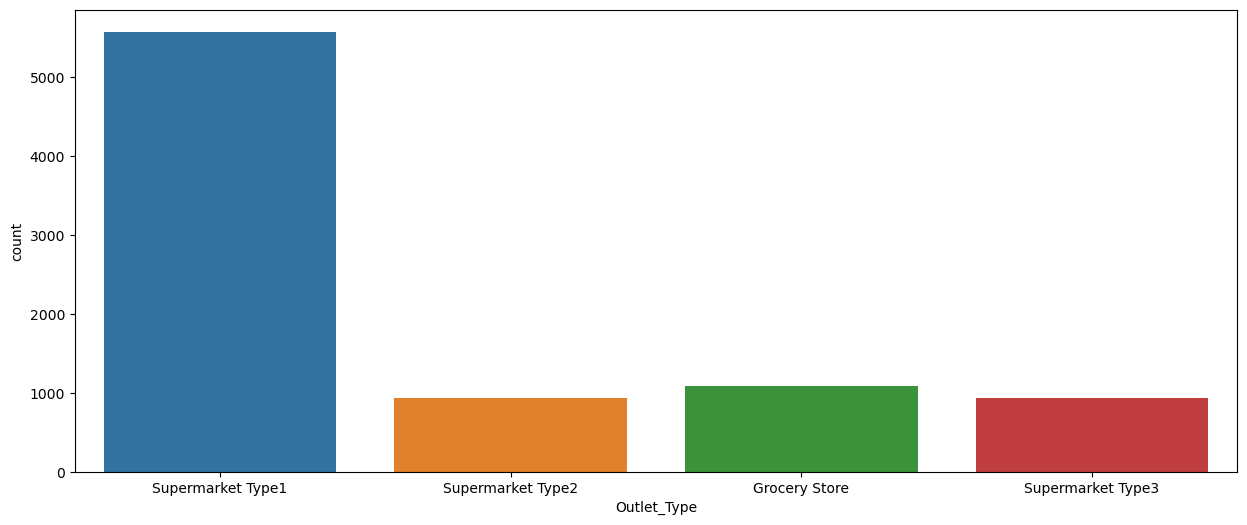

In [60]:
sns.countplot(x= dt['Outlet_Type'])
plt.show()


In [61]:
# Exclude non-numeric columns
numeric_columns = dt.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = numeric_columns.corr()

# Display the correlation matrix
display(corr)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017477,0.025972,-0.013418,0.007675,0.013418
Item_Visibility,-0.017477,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.025972,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013418,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007675,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013418,0.078355,-0.005020,-1.000000,-0.077032,1.000000


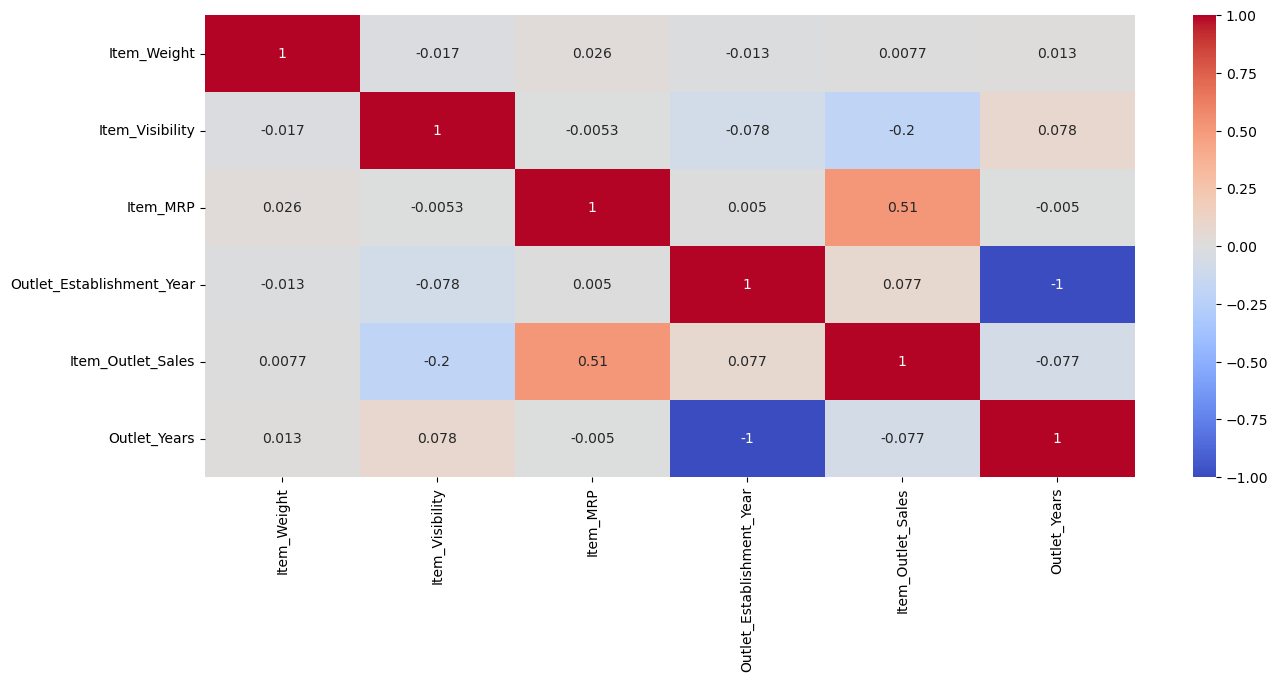

In [62]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [63]:
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.597664,Food,24
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,35


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])


0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [65]:
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
display (dt.head()) 


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,23,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,13,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,23,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,3,2,0,6.597664,1,24,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,35,1


In [66]:
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
display (dt.head())


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,23,9,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,13,3,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,23,9,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,24,0,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,35,1,...,False,False,True,False,True,False,False,False,False,True


In [67]:
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
X.head()


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,23,9,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,5.92,0.019278,14,48.2692,13,3,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,17.50,0.016760,10,141.6180,23,9,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,19.20,0.066132,6,182.0950,24,0,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
4,8.93,0.066132,9,53.8614,35,1,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True


In [68]:
y = dt['Item_Outlet_Sales']
y.head()


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)


(8523, 23) (8523,)
(5966, 23) (2557, 23) (5966,) (2557,)


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    # training the model
    model.fit(X, y)
    
    pred = model.predict(X)
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    print ('Accuracy for full Data')
    print('R2_Score:', r2_score(y,pred))
    print ()

Model Report
Scoring - neg_mean_squared_error
[-0.29271824 -0.27380022 -0.28650685 -0.28450916 -0.28157839]
ABS Average of - neg_mean_squared_error 0.2838225748921782

R2 Score 
[0.69534635 0.73185961 0.7163057  0.73463311 0.72780316]
Average R2 Score  0.7211895851380342

Accuracy for full Data
R2_Score: 0.7232624990443841

Outlet_Type_0            -1.510293
Outlet_Size_0            -0.060927
Outlet_Size_3            -0.048103
Item_Visibility          -0.038618
New_Item_Type_0          -0.026509
Outlet_Location_Type_2   -0.018702
Outlet_Location_Type_0   -0.011654
Outlet                   -0.011065
Item_Fat_Content_0       -0.010449
Item_Weight              -0.001516
Outlet_Years             -0.000209
Item_Type                 0.000923
Item_Fat_Content_2        0.005071
Item_Fat_Content_1        0.005377
New_Item_Type_2           0.005377
Item_MRP                  0.008172
New_Item_Type_1           0.021131
Outlet_Size_2             0.024917
Outlet_Location_Type_1    0.030356
Outlet_Si

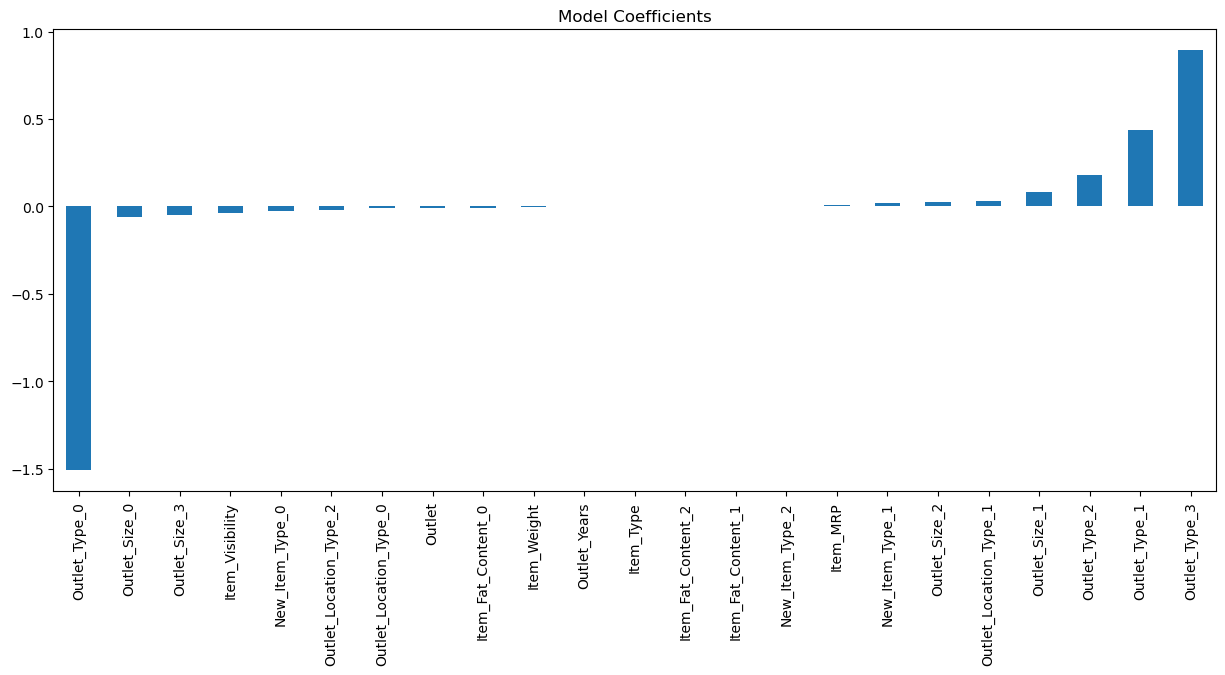

In [71]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.29266649 -0.27373699 -0.28651665 -0.28456731 -0.28161566]
ABS Average of - neg_mean_squared_error 0.2838206209192222

R2 Score 
[0.69540021 0.73192153 0.71629599 0.73457888 0.72776713]
Average R2 Score  0.7211927497441577

Accuracy for full Data
R2_Score: 0.7232602398851811



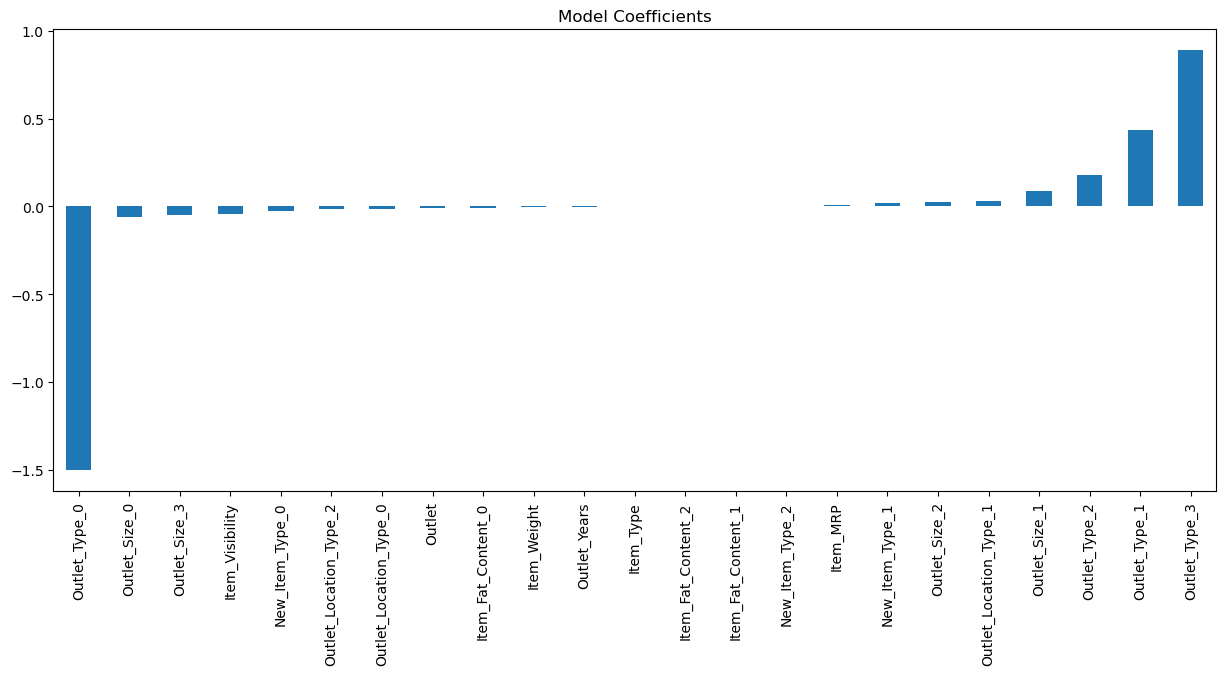

In [72]:
model = Ridge()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.72314998 -0.75701947 -0.75847666 -0.74093272 -0.78787083]
ABS Average of - neg_mean_squared_error 0.7534899315973709

R2 Score 
[0.24736402 0.25862917 0.24896908 0.30891853 0.23837923]
Average R2 Score  0.2604520071591053

Accuracy for full Data
R2_Score: 0.26227683517122646



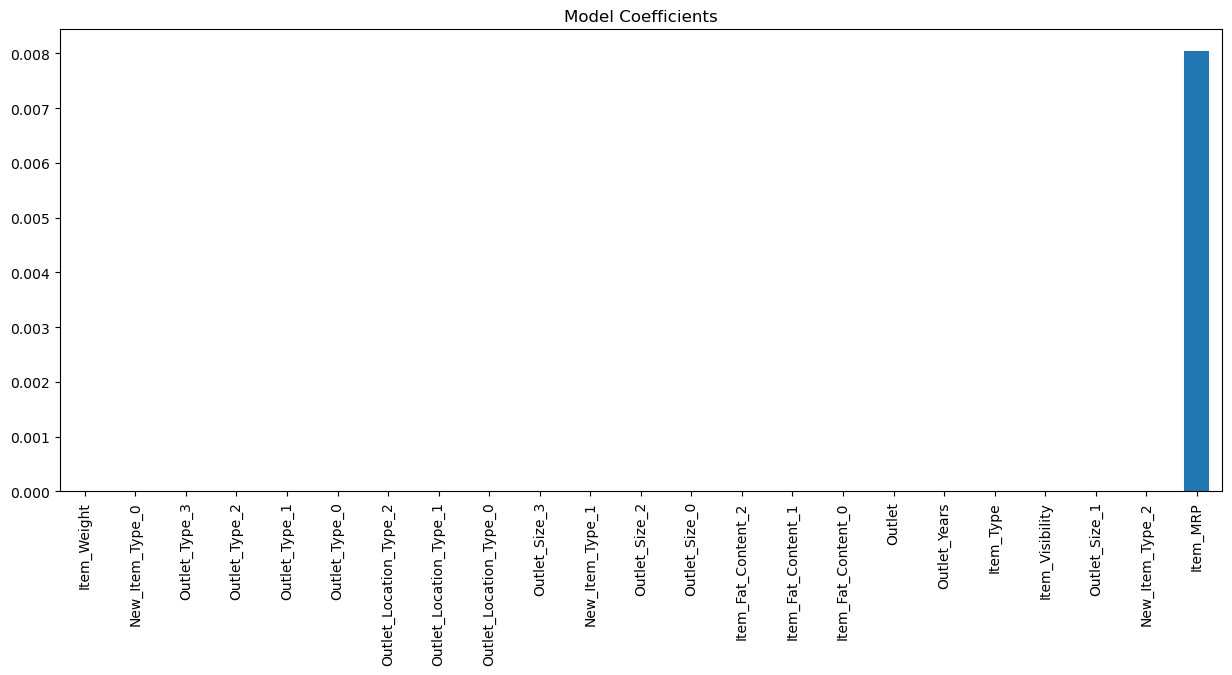

In [73]:
model = Lasso()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.56350535 -0.54633665 -0.52507448 -0.55952762 -0.55719854]
ABS Average of - neg_mean_squared_error 0.550328527745638

R2 Score 
[0.40111405 0.44450454 0.45590448 0.47547251 0.46733491]
Average R2 Score  0.4488660988849906

Accuracy for full Data
R2_Score: 1.0



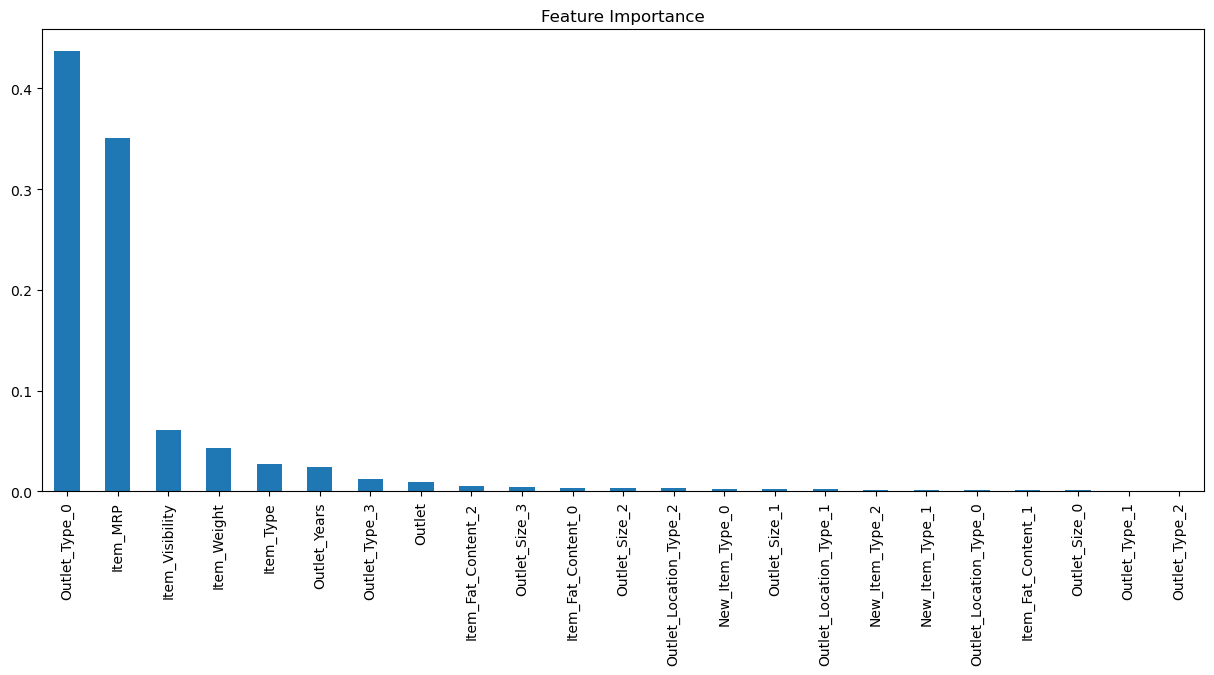

In [74]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


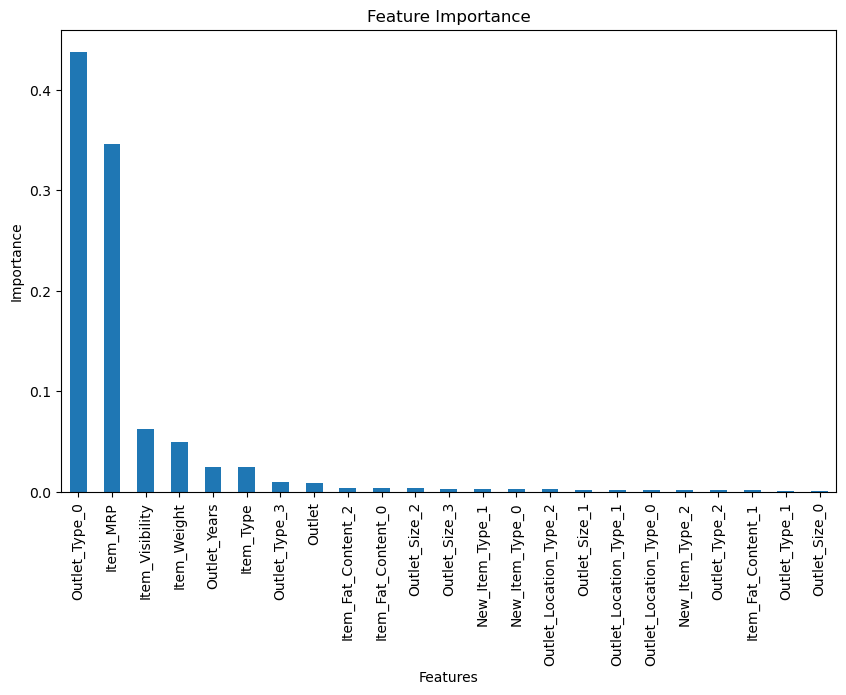

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your training data
# Make sure to replace X_train and y_train with your actual data

# Instantiate the RandomForestRegressor
model = RandomForestRegressor()

# Fit the model with your training data
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', title="Feature Importance")
plt.xlabel('Features')
plt.ylabel('Importance')

# Explicitly display the plot
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.32637765 -0.30975986 -0.31756204 -0.31491628 -0.31676592]
ABS Average of - neg_mean_squared_error 0.31707635113856303

R2 Score 
[0.65547358 0.69739363 0.69041145 0.7028347  0.69340229]
Average R2 Score  0.6879031321974755

Accuracy for full Data
R2_Score: 1.0



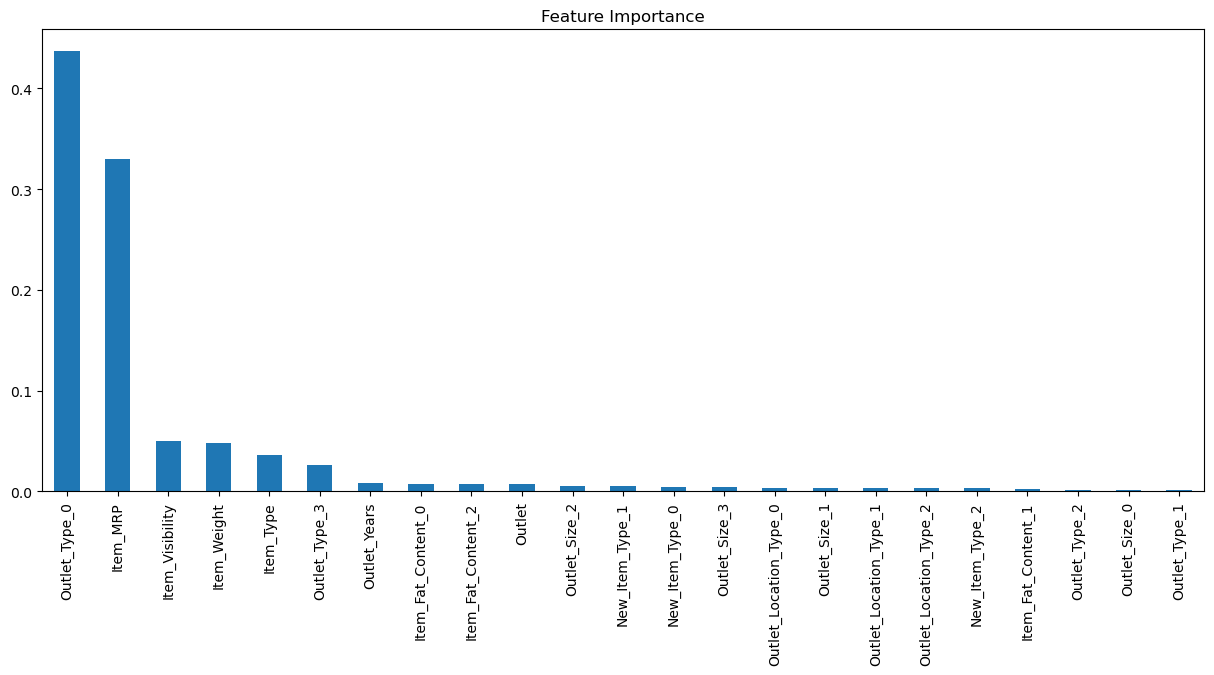

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 23
[LightGBM] [Info] Start training from score 7.295854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 23
[LightGBM] [Info] Start training from score 7.292207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

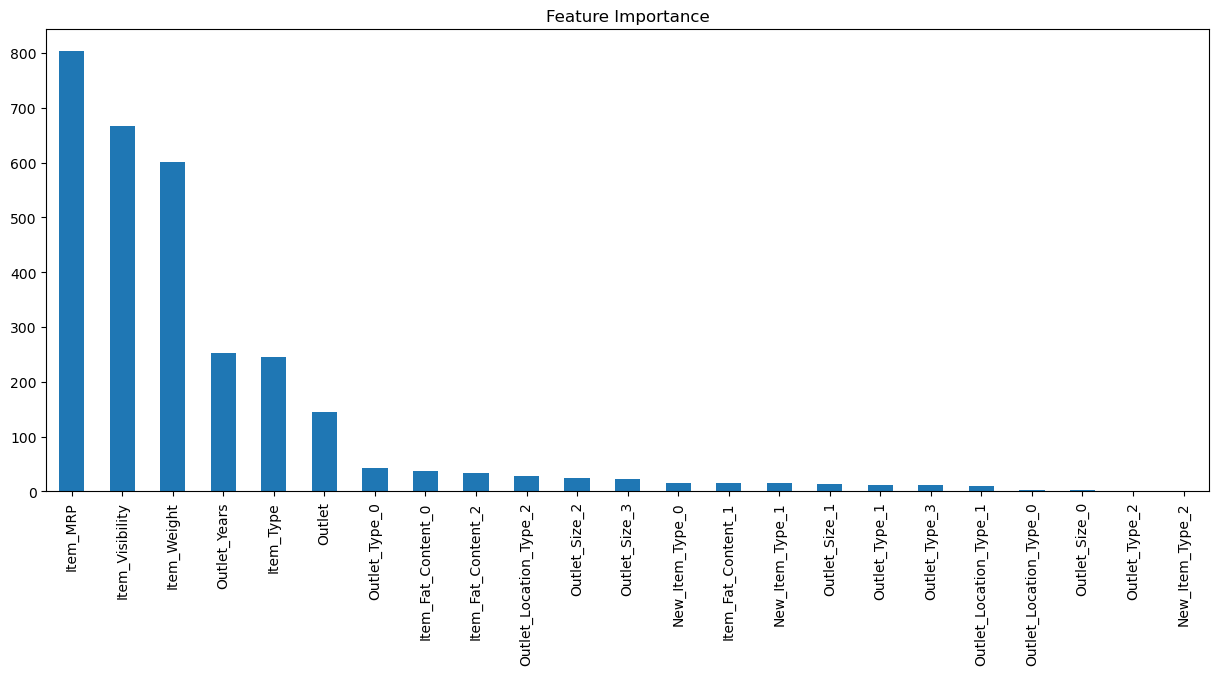

In [77]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()



Model Report
Scoring - neg_mean_squared_error
[-0.33313603 -0.30531292 -0.33051556 -0.32845859 -0.32241877]
ABS Average of - neg_mean_squared_error 0.32396837448787597

R2 Score 
[0.65328055 0.70099832 0.67272901 0.69364068 0.68832349]
Average R2 Score  0.6817944102882506

Accuracy for full Data
R2_Score: 0.9158956984435025



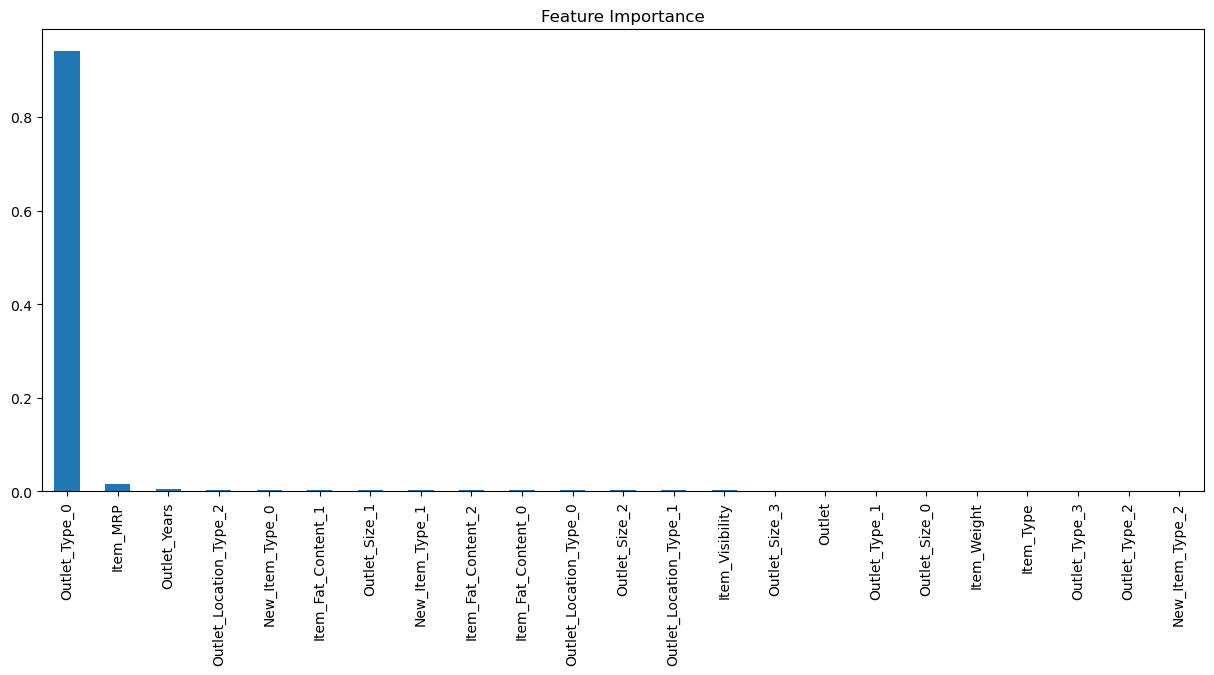

In [78]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


In [80]:
from sklearn.model_selection import RandomizedSearchCV
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]



In [82]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
display (rf.fit(X_train, y_train))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
print(rf.best_params_)
print(rf.best_score_)
predictions=rf.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)


{'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
-0.28783927936610365


0.7104017263924582

array([7.78041451, 7.50520886, 7.74210301, ..., 7.39974504, 7.81631511,
       7.74228121])

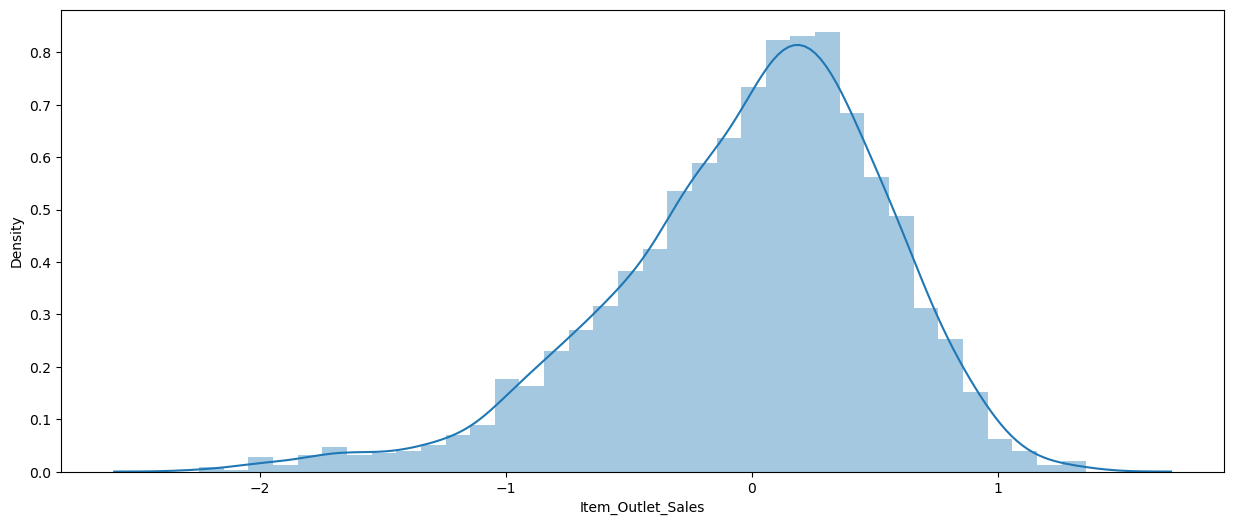

In [85]:
sns.distplot(y_test-predictions)
plt.show()


In [87]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [89]:
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 23
[LightGBM] [Info] Start training from score 7.296077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000028A16CDF990>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000028A16CDCB90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A16CA12D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A16CEB510>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000028A16CE9510>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
print(lgb.best_params_)
print(lgb.best_score_)
predictions=lgb.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions) 


{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.270486817430124
[LightGBM] [Warning] Unknown parameter: gamma


0.7378840825312187

array([7.76943348, 7.43403433, 7.51033891, ..., 7.39307919, 7.75267129,
       7.85537919])

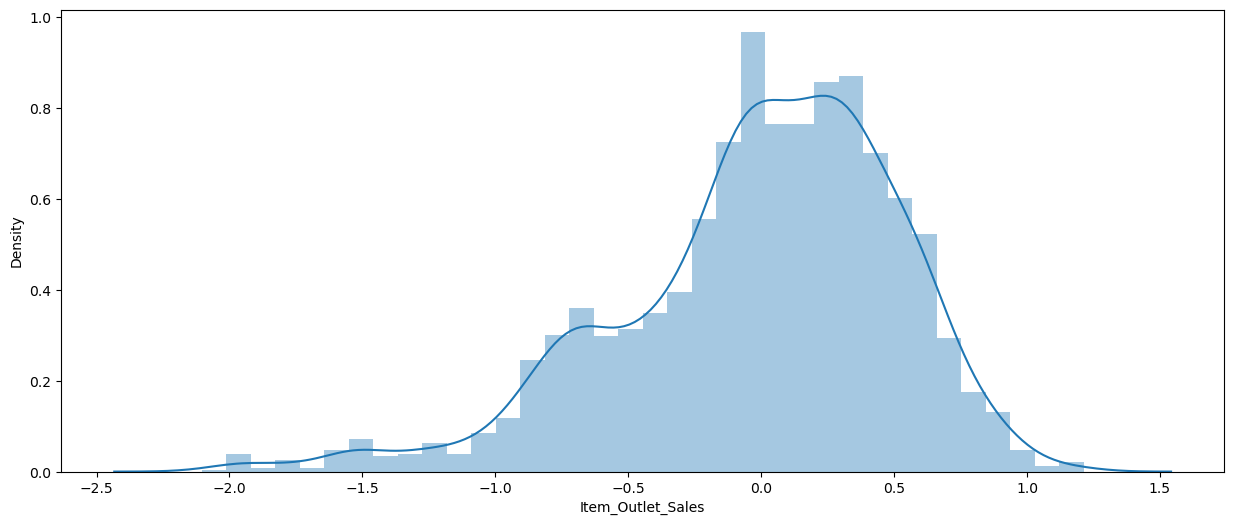

In [91]:
sns.distplot(y_test-predictions)
plt.show()


In [99]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}



In [101]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Assuming 'model' is an instance of GradientBoostingRegressor
model = GradientBoostingRegressor()

# Specify the hyperparameter grid without 'gamma'
params = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    # Add other valid parameters as needed
}

# Randomized search
xgb = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)
xgb.fit(X, y)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=300, subsample=0.8; total time=  18.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=300, subsample=0.8; total time=  18.4s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=300, subsample=0.8; total time=  17.9s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=300, subsample=0.8; total time=  19.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=300, subsample=0.8; total time=  20.7s
[CV] END learning_rate=0.01, max_depth=9, min_samples_split=2, n_estimators=400, subsample=0.9; total time=  37.3s
[CV] END learning_rate=0.01, max_depth=9, min_samples_split=2, n_estimators=400, subsample=0.9; total time=  35.7s
[CV] END learning_rate=0.01, max_depth=9, min_samples_split=2, n_estimators=400, subsample=0.9; total time=  36.7s
[CV] END learning_rate=0

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [102]:
print(xgb.best_params_)
print(xgb.best_score_)
predictions=xgb.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)


{'subsample': 0.9, 'n_estimators': 400, 'min_samples_split': 2, 'max_depth': 7, 'learning_rate': 0.01}
-0.2825155826363697


0.7965504569168018

array([7.77687452, 7.31212599, 7.60003758, ..., 7.40747213, 7.78968097,
       7.88768162])

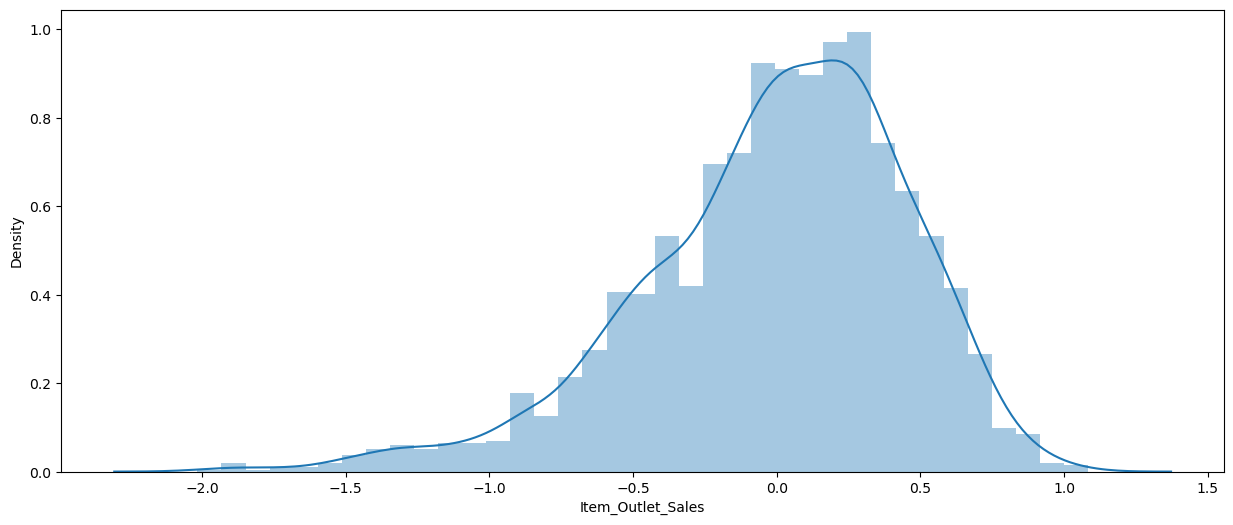

In [103]:
sns.distplot(y_test-predictions)
plt.show()